# Setup

In [1]:
# import packages
%run ../global_packages.py

# get the global parameters
%run ../global_pars.py

# import your local functions
sys.path.insert(1, '../')
from global_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

# Paths and Parameters

In [2]:
figpath = '../figures/'

# Get Data

In [3]:
ds_WOD = xr.open_dataset('../data_processing/1_WOD_Coastal/wod_coastal_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                (depth: 97, time_eAS: 22560, time_eBoB: 20458, time_wAS: 30300, time_wBoB: 2419)
Coordinates:
  * time_wAS               (time_wAS) datetime64[ns] 1958-01-16 ... 2020-05-23
  * time_eAS               (time_eAS) datetime64[ns] 1958-01-02 ... 2020-05-31
  * time_wBoB              (time_wBoB) datetime64[ns] 1959-08-20 ... 2020-05-28
  * time_eBoB              (time_eBoB) datetime64[ns] 1958-02-05 ... 2020-05-29
  * depth                  (depth) int64 0 5 10 15 20 ... 4700 4800 4900 5000
Data variables:
    lat_wAS                (time_wAS) float32 ...
    lon_wAS                (time_wAS) float32 ...
    mon_wAS                (time_wAS) int64 ...
    seas_wAS               (time_wAS) int64 ...
    lat_eAS                (time_eAS) float32 ...
    lon_eAS                (time_eAS) float32 ...
    mon_eAS                (time_eAS) int64 ...
    seas_eAS               (time_eAS) int64 ...
    lat_wBoB               (time_wBoB) float32 ...
    lon

In [4]:
df = pd.read_excel('../data_processing/5_Hypoxia_Records/indian_ocean_hypoxia_records_Pearson_2021.xlsx',header = 9)
df

,Countries,Region,Lat,Lon,Season,Year,Hypoxia Frequency,Classification,Comment,Reference
0,Yemen and Oman,WAS,14.500000,52.000000,Summer/Fall,1960-2008,Seasonal,Upwelling,Defines hypoxia as <3.5ml/l in paper. Hypoxic ...,"Piontkovski, S. A., & Al-Oufi, H. S. (2015). T..."
1,Yemen and Oman,WAS,15.500000,54.500000,Summer/Fall,1960-2008,Seasonal,Upwelling,Defines hypoxia as <3.5ml/l in paper. Hypoxic ...,"Piontkovski, S. A., & Al-Oufi, H. S. (2015). T..."
2,Yemen and Oman,WAS,16.500000,56.500000,Summer/Fall,1960-2008,Seasonal,Upwelling,Defines hypoxia as <3.5ml/l in paper. Hypoxic ...,"Piontkovski, S. A., & Al-Oufi, H. S. (2015). T..."
3,Yemen and Oman,WAS,18.000000,58.500000,Summer/Fall,1960-2008,Seasonal,Upwelling,Defines hypoxia as <3.5ml/l in paper. Hypoxic ...,"Piontkovski, S. A., & Al-Oufi, H. S. (2015). T..."
4,Yemen and Oman,WAS,19.500000,59.500000,Summer/Fall,1960-2008,Seasonal,Upwelling,Defines hypoxia as <3.5ml/l in paper. Hypoxic ...,"Piontkovski, S. A., & Al-Oufi, H. S. (2015). T..."
5,Yemen and Oman,WAS,21.500000,60.500000,Summer/Fall,1960-2008,Seasonal,Upwelling,Defines hypoxia as <3.5ml/l in paper. Hypoxic ...,"Piontkovski, S. A., & Al-Oufi, H. S. (2015). T..."
6,Oman,WAS,24.000000,58.500000,Summer/Fall,1994,Unknown,Other or Unknown,"Hypoxia threshold not defined in paper, defaul...","Piontkovski, S.A., Al-Gheilani, H.M.H., Jupp, ..."
7,Oman,WAS,24.000000,58.500000,Winter/Spring,1994,Unknown,Other or Unknown,"Hypoxia threshold not defined in paper, defaul...","Piontkovski, S.A., Al-Gheilani, H.M.H., Jupp, ..."
8,India,EAS,9.978947,76.266489,Summer/Fall,2004,Seasonal,Eutrophication and Upwelling,Hypoxic defined as less than 22 uM in paper. ...,"Martin, G.D., Muraleedharan, K.R., Vijay, J.G...."
9,India,EAS,11.500000,75.200000,Summer/Fall,1958,Seasonal,Upwelling,"No threshold for hypoxia given in paper, using...","Banse, K. (1959). On upwelling and bottom-traw..."


In [5]:
ds_HE = xr.Dataset.from_dataframe(df)
# add new hypoxia driver numeric colums
ds_HE.Classification[ds_HE.Classification  == 'Upwelling'] = 0
ds_HE.Classification[ds_HE.Classification  == 'Eutrophication and Upwelling'] = 0.5
ds_HE.Classification[ds_HE.Classification  == 'Eutrophication'] = 1
ds_HE.Classification[ds_HE.Classification  == 'Other or Unknown'] = 2
ds_HE

<xarray.Dataset>
Dimensions:            (index: 109)
Coordinates:
  * index              (index) int64 0 1 2 3 4 5 6 ... 103 104 105 106 107 108
Data variables:
    Countries          (index) object 'Yemen and Oman' ... 'Thailand'
    Region             (index) object 'WAS' 'WAS' 'WAS' ... 'EBoB' 'EBoB' 'EBoB'
    Lat                (index) float64 14.5 15.5 16.5 18.0 ... 19.0 17.5 16.0
    Lon                (index) float64 52.0 54.5 56.5 58.5 ... 93.0 93.5 94.0
    Season             (index) object 'Summer/Fall' 'Summer/Fall' ... 'All Year'
    Year               (index) object '1960-2008' '1960-2008' ... '2007-2009'
    Hypoxia Frequency  (index) object 'Seasonal' 'Seasonal' ... 'Persistent'
    Classification     (index) object 0 0 0 0 0 0 2 2 0.5 ... 1 1 0 2 2 2 2 2 2
    Comment            (index) object 'Defines hypoxia as <3.5ml/l in paper. Hypoxic below ~25m per Fig 3, associated with upwelling during summer monsoon, and decadal shoaling of oxycline linked to warming of Arabia

In [6]:
ds_mask = xr.open_dataset('../data_processing/1_WOD_Coastal/IO_coastal_mask.nc')
ds_mask

<xarray.Dataset>
Dimensions:    (latn: 138, latw: 138, loc_wod: 316656, lonn: 216, lonw: 216)
Coordinates:
  * latw       (latw) float64 -1.375 -1.125 -0.875 -0.625 ... 32.38 32.62 32.88
  * lonw       (lonw) float64 48.62 48.88 49.12 49.38 ... 101.9 102.1 102.4
  * latn       (latn) float64 -1.5 -1.25 -1.0 -0.75 ... 32.0 32.25 32.5 32.75
  * lonn       (lonn) float64 48.5 48.75 49.0 49.25 ... 101.5 101.8 102.0 102.2
  * loc_wod    (loc_wod) int64 0 1 2 3 4 ... 316651 316652 316653 316654 316655
Data variables:
    maskw      (latw, lonw) int64 ...
    maskn      (latn, lonn) float64 ...
    maskw_wod  (loc_wod) bool ...
    maskn_wod  (loc_wod) bool ...

# Subset for Coast

In [7]:
lat_slice_wAS = slice(bounds_wAS[2],bounds_wAS[3]) 
lon_slice_wAS = slice(bounds_wAS[0],bounds_wAS[1]) 

#subset gridded data
mask_wAS = ds_mask.maskn.sel(latn = lat_slice_wAS, lonn = lon_slice_wAS)
xx_wAS,yy_wAS = np.meshgrid(mask_wAS.lonn,mask_wAS.latn)
mask_wAS = mask_wAS.where(~((yy_wAS>22) & (yy_wAS<32) & (xx_wAS>45) & (xx_wAS<57.5)))
xx_wAS[np.isnan(mask_wAS)] = np.nan
yy_wAS[np.isnan(mask_wAS)] = np.nan
xx_wAS = xx_wAS.flatten()
yy_wAS = yy_wAS.flatten()

lat_slice_eAS = slice(bounds_eAS[2],bounds_eAS[3]) 
lon_slice_eAS = slice(bounds_eAS[0],bounds_eAS[1]) 
lat_slice_eAS_SL = slice(bounds_eAS_SL[2],bounds_eAS_SL[3]) 
lon_slice_eAS_SL = slice(bounds_eAS_SL[0],bounds_eAS_SL[1]) 

#subset gridded data
mask_eAS = ds_mask.maskw.sel(latw = lat_slice_eAS, lonw = lon_slice_eAS)
xx_eAS,yy_eAS = np.meshgrid(mask_eAS.lonw,mask_eAS.latw)
xx_eAS[mask_eAS == 0] = np.nan
yy_eAS[mask_eAS == 0] = np.nan
xx_eAS = xx_eAS.flatten()
yy_eAS = yy_eAS.flatten()

mask_eAS_SL = ds_mask.maskw.sel(latw = lat_slice_eAS_SL, lonw = lon_slice_eAS_SL)
xx_eAS_SL,yy_eAS_SL = np.meshgrid(mask_eAS_SL.lonw,mask_eAS_SL.latw)
xx_eAS_SL[np.array(mask_eAS_SL) == 0] = np.nan
yy_eAS_SL[np.array(mask_eAS_SL) == 0] = np.nan
xx_eAS_SL = xx_eAS_SL.flatten()
yy_eAS_SL = yy_eAS_SL.flatten()

xx_eAS = np.concatenate((xx_eAS,xx_eAS_SL),0)
yy_eAS = np.concatenate((yy_eAS,yy_eAS_SL),0)

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3]) 
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1]) 
lat_slice_wBoB_SL = slice(bounds_wBoB_SL[2],bounds_wBoB_SL[3])
lon_slice_wBoB_SL = slice(bounds_wBoB_SL[0],bounds_wBoB_SL[1])

#subset gridded data
mask_wBoB = ds_mask.maskn.sel(latn = lat_slice_wBoB, lonn = lon_slice_wBoB)
xx_wBoB,yy_wBoB = np.meshgrid(mask_wBoB.lonn,mask_wBoB.latn)
xx_wBoB[np.isnan(mask_wBoB)] = np.nan
yy_wBoB[np.isnan(mask_wBoB)] = np.nan
xx_wBoB = xx_wBoB.flatten()
yy_wBoB = yy_wBoB.flatten()

mask_wBoB_SL = ds_mask.maskn.sel(latn = lat_slice_wBoB_SL, lonn = lon_slice_wBoB_SL)
xx_wBoB_SL,yy_wBoB_SL = np.meshgrid(mask_wBoB_SL.lonn,mask_wBoB_SL.latn)
xx_wBoB_SL[np.isnan(np.array(mask_wBoB_SL))] = np.nan
yy_wBoB_SL[np.isnan(np.array(mask_wBoB_SL))] = np.nan
xx_wBoB_SL = xx_wBoB_SL.flatten()
yy_wBoB_SL = yy_wBoB_SL.flatten()

xx_wBoB = np.concatenate((xx_wBoB,xx_wBoB_SL),0)
yy_wBoB = np.concatenate((yy_wBoB,yy_wBoB_SL),0)

lat_slice_eBoB = slice(bounds_eBoB[2],bounds_eBoB[3]) 
lon_slice_eBoB = slice(bounds_eBoB[0],bounds_eBoB[1]) 

#subset gridded data
mask_eBoB = ds_mask.maskw.sel(latw = lat_slice_eBoB, lonw = lon_slice_eBoB)
xx_eBoB,yy_eBoB = np.meshgrid(mask_eBoB.lonw,mask_eBoB.latw)
mask_eBoB = mask_eBoB.where(~((yy_eBoB>6) & (yy_eBoB<15) & (xx_eBoB>100) & (xx_eBoB<110)),0)
mask_eBoB = mask_eBoB.where(~((yy_eBoB>8) & (yy_eBoB<15) & (xx_eBoB>99) & (xx_eBoB<110)),0)
xx_eBoB[mask_eBoB==0] = np.nan
yy_eBoB[mask_eBoB==0] = np.nan
xx_eBoB = xx_eBoB.flatten()
yy_eBoB = yy_eBoB.flatten()


# Plot

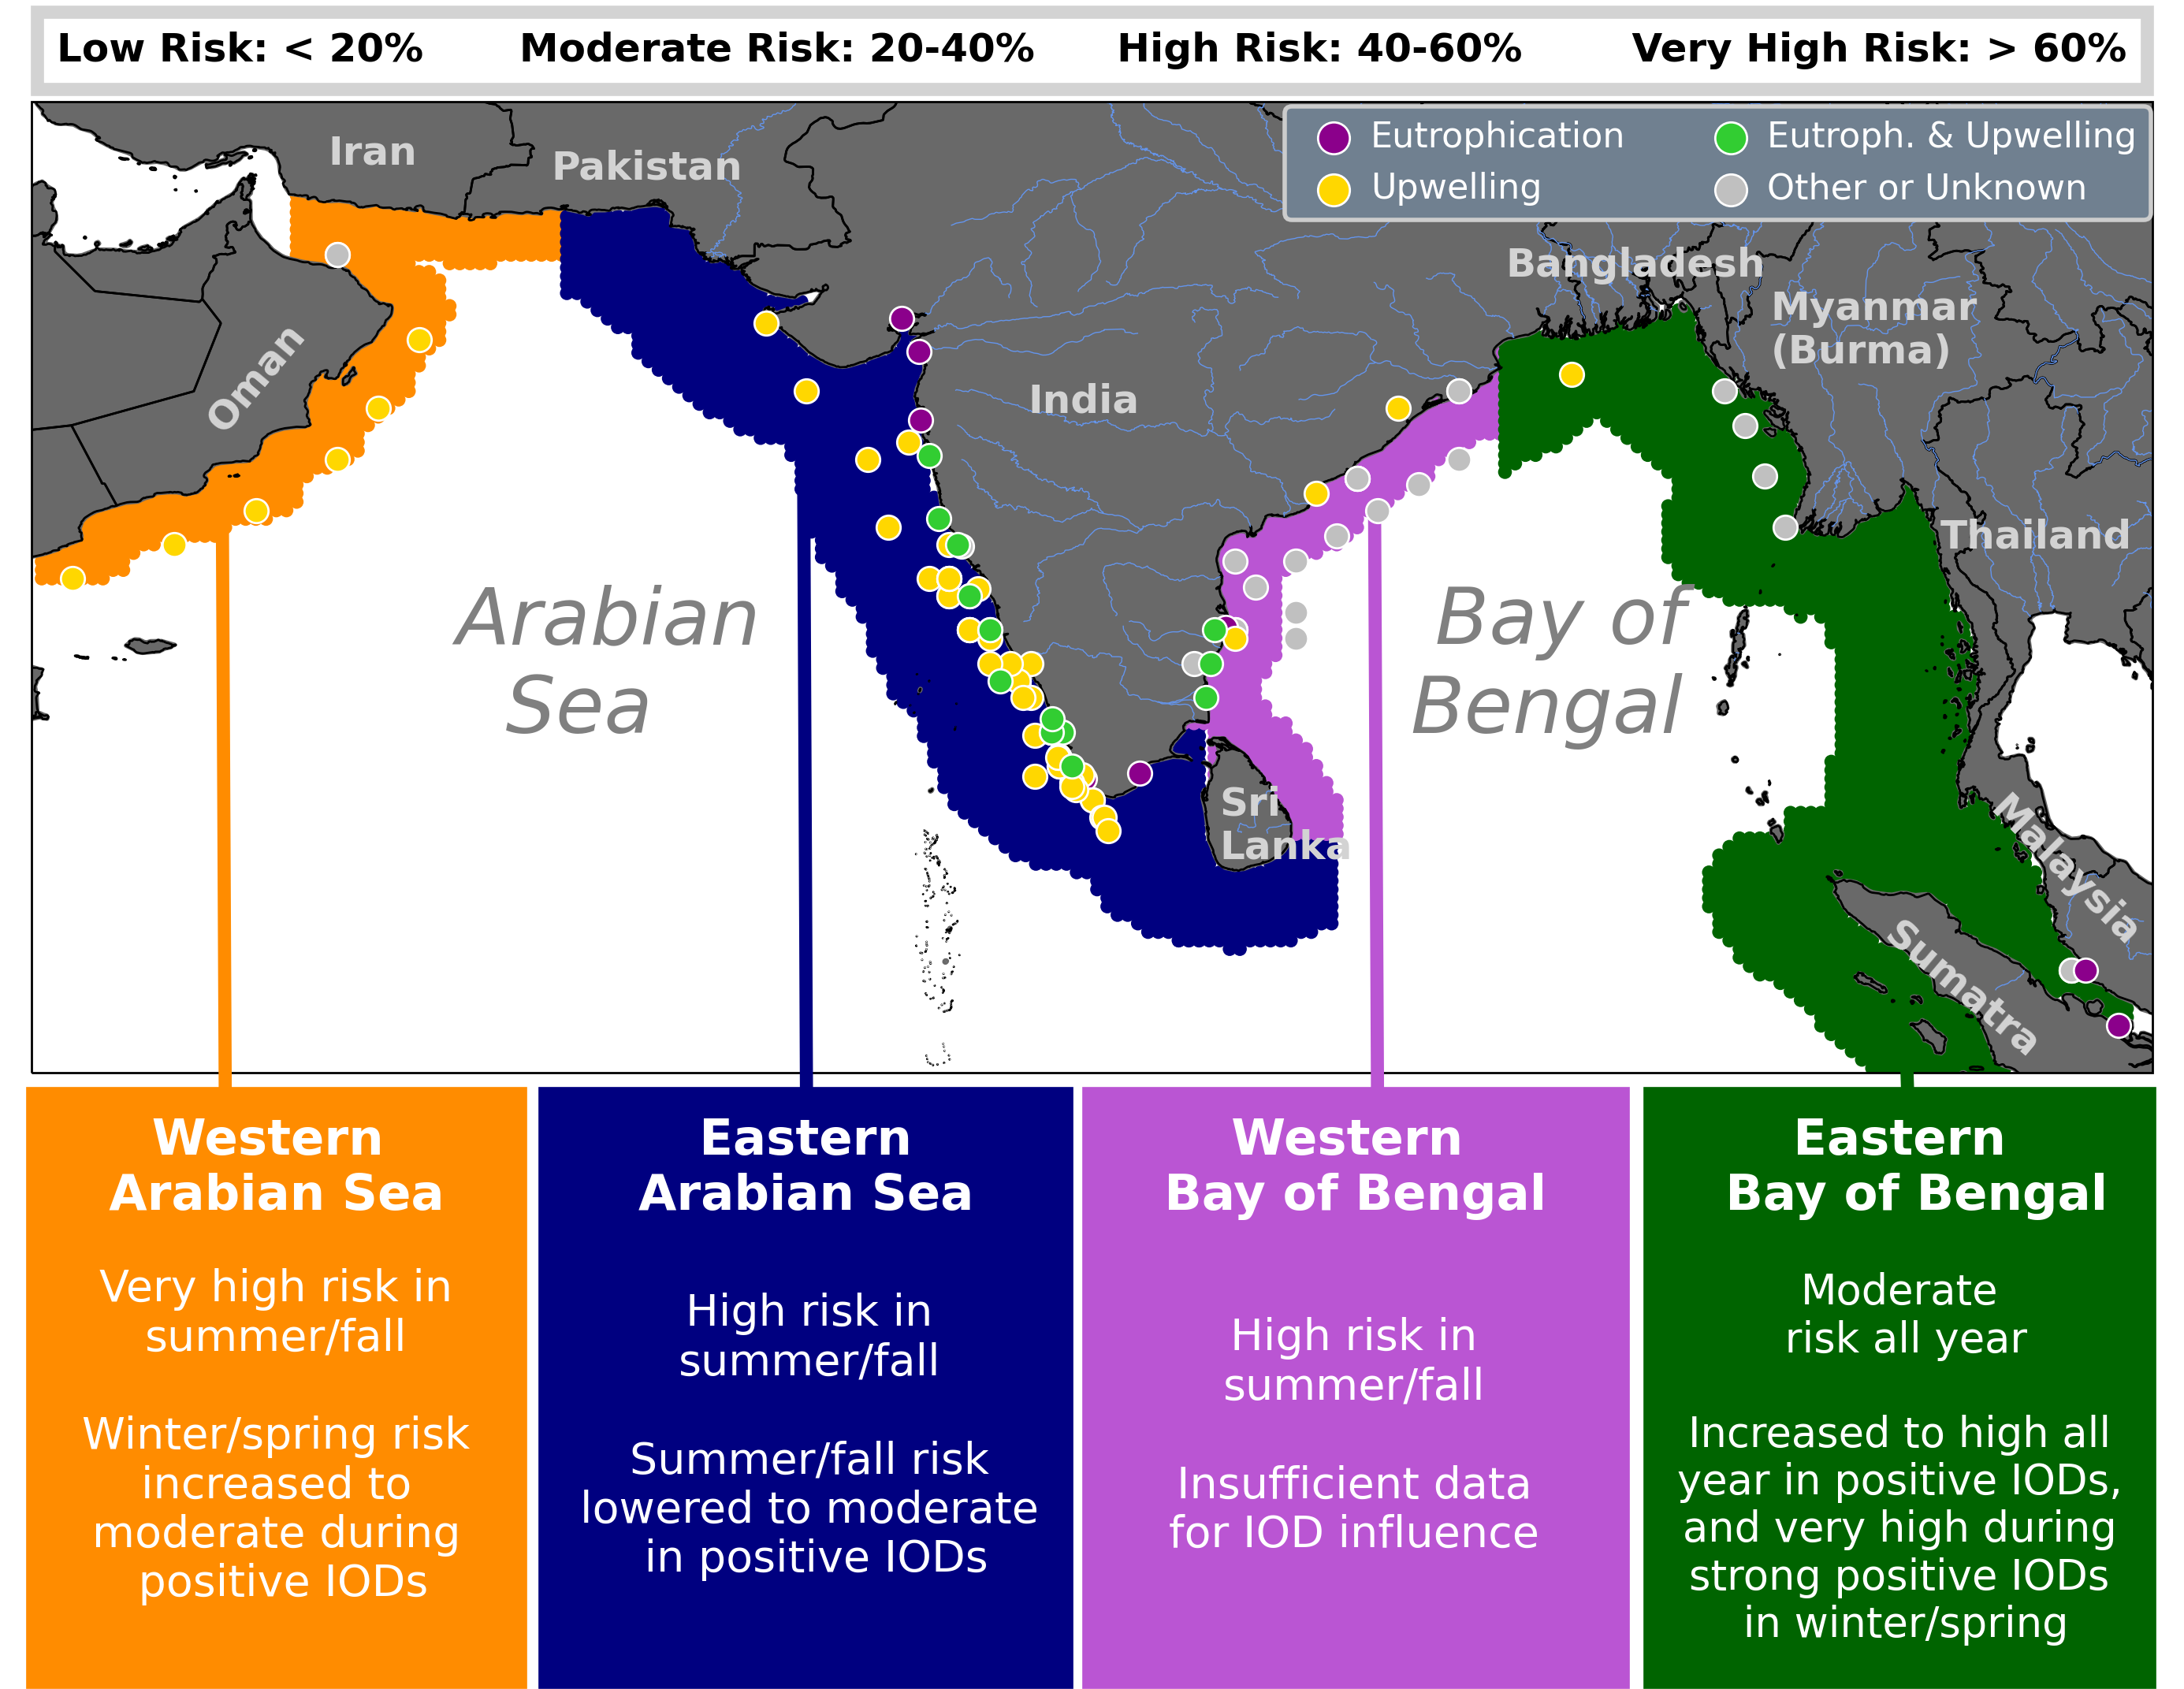

In [9]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 8,
         'axes.labelsize': 6,
         'axes.titlesize': 9,
         'xtick.labelsize':6,
         'ytick.labelsize':6,
         'axes.linewidth':0.35}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [51,103,0,28.5]
cmin = 20
cmax = 160
sz = 40
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['darkorange','navy','mediumorchid','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(17.8 / 2.54,5.5),dpi=400)

#############################################################
#----------------- Temperature ---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
plt.subplots_adjust(wspace = 0.15, bottom = 0.37, top = 0.93, right = 0.98, left = 0.02)
# add_bathy(ax,cbounds)

# wAS

p = ax.scatter(xx_wAS,yy_wAS,s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eAS

p = ax.scatter(xx_eAS,yy_eAS,s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# wBoB
p = ax.scatter(xx_wBoB,yy_wBoB,s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# eBoB
p = ax.scatter(xx_eBoB,yy_eBoB,s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = True, rcolor = 'cornflowerblue',ccolor = 'k')
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.xlocator = mticker.FixedLocator([54,78,102])


# ax.set_title('Risk of Hypoxia')

####### Hypoxia ##############################################

euclrs = ['darkmagenta','gold','limegreen','silver']
# other
ind = ds_HE.Classification == 2
ax.scatter(ds_HE.Lon[ind],ds_HE.Lat[ind],s=120,marker = '.',c=euclrs[3],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)

# eutrophic
ind = ds_HE.Classification == 1
ax.scatter(ds_HE.Lon[ind],ds_HE.Lat[ind],s=120,marker = '.',c=euclrs[0],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)

# upwelling
ind = ds_HE.Classification == 0
ax.scatter(ds_HE.Lon[ind],ds_HE.Lat[ind],s=120,marker = '.',c=euclrs[1],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)

# mix 0 and 1
ind = ds_HE.Classification == 0.5
ax.scatter(ds_HE.Lon[ind],ds_HE.Lat[ind],s=120,marker = '.',c=euclrs[2],lw = 0.5,
           edgecolor = 'w',transform=ccrs.PlateCarree(), zorder = 4)

# ####### Countries ##############################################
clr = 'lightgray'
csz = 9
add_text(ax, 'India', x = 0.47,y=0.68, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Bangladesh', x = 0.695,y=0.82, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Pakistan', x = 0.245,y=0.92, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Iran', x = 0.14,y=0.935, fontsize = csz, color = clr, weight = 'bold')
add_text(ax, 'Oman', x = 0.08,y=0.66, fontsize = csz, color = clr, rotation = 50, weight = 'bold')
add_text(ax, 'Myanmar\n(Burma)', x = 0.82,y=0.73, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Thailand', x = 0.9,y=0.54, fontsize = csz, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Malaysia', x = .92,y=0.13, fontsize = csz, color = clr, rotation = -45, weight = 'bold')
add_text(ax, 'Sumatra', x = 0.87,y=0.015, fontsize = csz, color = clr, rotation = -40, weight = 'bold')
add_text(ax, 'Sri\nLanka', x = 0.56,y=0.22, fontsize = csz, color = clr, weight = 'bold')

# Seas
add_text(ax, ' Bay of \nBengal', x = 0.65,y=0.35, fontsize = 18, color = 'gray', style='italic')
add_text(ax, 'Arabian\n  Sea', x = 0.2,y=0.35, fontsize = 18, color = 'gray', style='italic')

# ####### Boxes ##############################################
tsz = 11.25
sz = 10
lw = 3
alpha = 1
clrs = [[255/255,140/255,0,alpha],[0,0,128/255,alpha],[186/255,85/255,211/255,alpha],[0,100/255,0,alpha]]
eclrs = ['darkorange','navy','mediumorchid','darkgreen']

y = -9.25
ax.text(57, y, " Western  \n   Arabian Sea   \n\n\n\n\n\n\n\n",c='w',
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[0], 
              ec=eclrs[0], lw=lw))

ax.text(57, y, "\n\n\nVery high risk in\nsummer/fall\n\nWinter/spring risk\nincreased to\nmoderate during\n positive IODs\n",c='w',
        ha="center", va="center", size=sz)

ax.text(69.98, y, "   Eastern   \n    Arabian Sea    \n\n\n\n\n\n\n\n",c='w',
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[1], 
              ec=eclrs[1], lw=lw))

ax.text(70.07, y, "\n\nHigh risk in\nsummer/fall\n\nSummer/fall risk\nlowered to moderate\n in positive IODs",c='w',
        ha="center", va="center", size=sz)

ax.text(83.465, y, "   Western    \n   Bay of Bengal   \n\n\n\n\n\n\n\n",c='w',
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[2], 
              ec=eclrs[2], lw=lw))

ax.text(83.425, y,  "\n\n\nHigh risk in\nsummer/fall\n\nInsufficient data\nfor IOD influence\n",c='w',
        ha="center", va="center", size=sz)
 
ax.text(96.8,y, "   Eastern   \n   Bay of Bengal \n\n\n\n\n\n\n\n",c='w',
        ha="center", va="center", size=tsz,weight = 'bold',
    bbox=dict(boxstyle="square,pad=0.5", fc=clrs[3], 
              ec=eclrs[3], lw=lw))

# ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nRisk increased to\n(very) high in\n(strong) positive\nIOD phases\n",
#         ha="center", va="center", size=sz)

ax.text(96.8,y, "\n\n\nModerate\n risk all year\n\nIncreased to high all\nyear in positive IODs,\nand very high during\nstrong positive IODs\n in winter/spring",c='w',
        ha="center", va="center", size=sz-.5)

ax.text(77.0,30, "Low Risk: < 20%       Moderate Risk: 20-40%      High Risk: 40-60%        Very High Risk: > 60%",
        ha="center", va="center", size=9,weight = 'bold',
       bbox=dict(boxstyle="square,pad=0.5", fc='w', 
              ec='lightgray', lw=lw))
y = -.7
plt.annotate(' ', (55.75,y),(55.5,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[0]))

plt.annotate(' ', (70,y),(69.75,20),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[1]))

plt.annotate(' ', (84,y),(83.75,18),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[2]))

plt.annotate(' ', (97,y),(96.75,2),annotation_clip=False,
             arrowprops=dict(arrowstyle="-",lw=lw, color= eclrs[3]))

###### Legend #######

ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[0],lw = 0.5,
                       edgecolor = 'w', label = 'Eutrophication')
ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[1],lw = 0.5,
                       edgecolor = 'w', label = 'Upwelling')
ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[2],lw = 0.5,
                       edgecolor = 'w', label = 'Eutroph. & Upwelling')
ax.scatter(np.nan,np.nan,s=5,marker = '.',c=euclrs[3],lw = 0.5,
                       edgecolor = 'w', label = 'Other or Unknown')
    
    
l = ax.legend(loc='lower center', bbox_to_anchor=(.795, .86),ncol = 2,
              markerscale = 6.5,facecolor = 'slategray',framealpha=1,handletextpad=0.05);
for text in l.get_texts():
    text.set_color("w")
